In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

In [2]:
animals = pd.read_csv('zootest.csv')
classes = pd.read_csv('name_fix.csv')


In [3]:
# Podría usar la columna class_type del zoológico y Class_Number de la clase para
# unirme, pero usaré Animal_Names para mostrar cómo funciona la explosión.
# La columna 'Animal_Names' tiene varios valores
# Usamos split para convertir la cadena en un array, separando los elementos por ','
classes['animal_mame'] = classes['animal_mame'].str.split(',')
# Explotamos la columna 'Animal_Names', generando un registro por valor
classes = classes.explode('animal_mame')
# Eliminar espacios en blanco
classes['animal_mame'] = classes['animal_mame'].str.strip()
classes.head(5)

,class_number,number_species_in_class,class_type,animal_mame
0,1,41,mammal,aardvark
0,1,41,mammal,antelope
0,1,41,mammal,bear
0,1,41,mammal,boar
0,1,41,mammal,buffalo


In [4]:
# Haz una unión interna entre animales y clases.
animals_classes = pd.merge(left= animals, right=classes, left_on='animal_name', right_on='animal_mame')
# Eliminar columnas de clase innecesarias
animals_classes.drop(['type_numeric', 'class_number', 'number_species_in_class', 'animal_mame'], axis=1, inplace=True)
animals_classes.set_index('animal_name', inplace=True)
animals_classes.head(5)

,hair_boolean,feathers_boolean,eggs_boolean,milk_boolean,airborne_boolean,aquatic_boolean,predator_boolean,toothed_boolean,backbone_boolean,breathes_boolean,venomous_boolean,fins_boolean,legs_numeric,tail_boolean,domestic_boolean,catsize_boolean,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


In [5]:
# Usando todo menos la clase
X = animals_classes.drop(['class_type'], axis=1)
# Queremos descubrir la clase.
y = animals_classes['class_type']

In [6]:
# Obtenga un 20% de descuento para realizar pruebas
from sklearn.model_selection import train_test_split

# La opción estratificar usa y para mantener la misma proporción de clases en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [7]:
# Entrena con el 80%
from sklearn.neural_network import MLPClassifier

# Crear una instancia de un clasificador de tipo red neuronal con un máximo de 2000 épocas
model = MLPClassifier(random_state=1, max_iter=2000)

# Entrena el modelo
model.fit(X_train, y_train)


MLPClassifier(max_iter=2000, random_state=1)

Exactitud: 0.90
Precisión: 0.74
Matriz de confusión


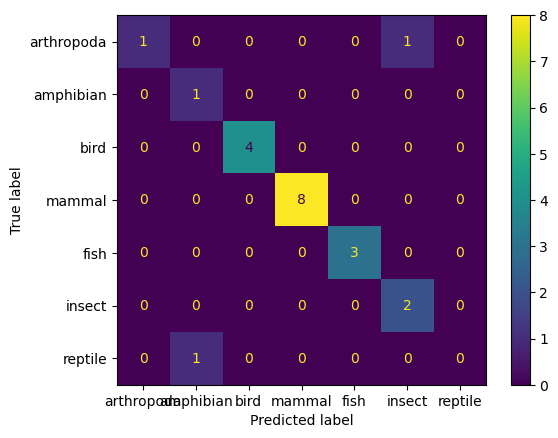

In [8]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predicción
y_pred = model.predict(X_test)

# Exactitud
acc = accuracy_score(y_test, y_pred)
print("Exactitud: {:.2f}".format(acc))
# Precisión
precision = precision_score(y_test, y_pred, average='macro', zero_division=0.0)
print("Precisión: {:.2f}".format(precision))

# Matriz de confusión
print('Matriz de confusión')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()